In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
train_df = pd.read_csv(r'C:\Users\Prasanna\Documents\IIT Hyderabad\Sem 1\ML\Assignment_4\train.csv', nrows=1000000, parse_dates=["pickup_datetime"])
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000000 entries, 0 to 999999
Data columns (total 8 columns):
 #   Column             Non-Null Count    Dtype              
---  ------             --------------    -----              
 0   key                1000000 non-null  object             
 1   fare_amount        1000000 non-null  float64            
 2   pickup_datetime    1000000 non-null  datetime64[ns, UTC]
 3   pickup_longitude   1000000 non-null  float64            
 4   pickup_latitude    1000000 non-null  float64            
 5   dropoff_longitude  999990 non-null   float64            
 6   dropoff_latitude   999990 non-null   float64            
 7   passenger_count    1000000 non-null  int64              
dtypes: datetime64[ns, UTC](1), float64(5), int64(1), object(1)
memory usage: 61.0+ MB


Checking for missing values:

In [3]:
print(train_df.isnull().sum())

key                   0
fare_amount           0
pickup_datetime       0
pickup_longitude      0
pickup_latitude       0
dropoff_longitude    10
dropoff_latitude     10
passenger_count       0
dtype: int64


In [5]:
#removing all columns where latitute and longitude are not present
train_df = train_df.dropna(how='any', axis='rows')
train_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 999990 entries, 0 to 999999
Data columns (total 8 columns):
 #   Column             Non-Null Count   Dtype              
---  ------             --------------   -----              
 0   key                999990 non-null  object             
 1   fare_amount        999990 non-null  float64            
 2   pickup_datetime    999990 non-null  datetime64[ns, UTC]
 3   pickup_longitude   999990 non-null  float64            
 4   pickup_latitude    999990 non-null  float64            
 5   dropoff_longitude  999990 non-null  float64            
 6   dropoff_latitude   999990 non-null  float64            
 7   passenger_count    999990 non-null  int64              
dtypes: datetime64[ns, UTC](1), float64(5), int64(1), object(1)
memory usage: 68.7+ MB


In [6]:
train_df.head()

,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
0,2009-06-15 17:26:21.0000001,4.5,2009-06-15 17:26:21+00:00,-73.844311,40.721319,-73.841610,40.712278,1
1,2010-01-05 16:52:16.0000002,16.9,2010-01-05 16:52:16+00:00,-74.016048,40.711303,-73.979268,40.782004,1
2,2011-08-18 00:35:00.00000049,5.7,2011-08-18 00:35:00+00:00,-73.982738,40.761270,-73.991242,40.750562,2
3,2012-04-21 04:30:42.0000001,7.7,2012-04-21 04:30:42+00:00,-73.987130,40.733143,-73.991567,40.758092,1
4,2010-03-09 07:51:00.000000135,5.3,2010-03-09 07:51:00+00:00,-73.968095,40.768008,-73.956655,40.783762,1


**The 'key' column can be removed as it does not give any useful information**

In [7]:
train_df.drop(['key'],axis=1,inplace=True)
train_df.head()

,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
0,4.5,2009-06-15 17:26:21+00:00,-73.844311,40.721319,-73.841610,40.712278,1
1,16.9,2010-01-05 16:52:16+00:00,-74.016048,40.711303,-73.979268,40.782004,1
2,5.7,2011-08-18 00:35:00+00:00,-73.982738,40.761270,-73.991242,40.750562,2
3,7.7,2012-04-21 04:30:42+00:00,-73.987130,40.733143,-73.991567,40.758092,1
4,5.3,2010-03-09 07:51:00+00:00,-73.968095,40.768008,-73.956655,40.783762,1


In [8]:
train_df.describe()

,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
count,999990.000000,999990.000000,999990.000000,999990.000000,999990.000000,999990.000000
mean,11.347953,-72.526699,39.929040,-72.527860,39.919954,1.684941
std,9.821790,12.057778,7.626087,11.324494,8.201418,1.323907
min,-44.900000,-3377.680935,-3116.285383,-3383.296608,-3114.338567,0.000000
25%,6.000000,-73.992060,40.734965,-73.991385,40.734046,1.000000
50%,8.500000,-73.981792,40.752695,-73.980135,40.753166,1.000000
75%,12.500000,-73.967094,40.767154,-73.963654,40.768129,2.000000
max,500.000000,2522.271325,2621.628430,45.581619,1651.553433,208.000000


We can observe the following:
1. Fare amount is negative which is not possible
2. The minimum and maximum of pickup_longitude, pickup_latitude, dropoff_longitude and dropoff_latitude are way beyond the bounds. 
3. The minimum of passenger count is zero which doesn't make sense. The data points with passenger count as zero can be removed

#### Removing outliers or unnecessary information:

**Fare Amount** : The minimum taxi fare in the New York City is $2.50
                  https://www1.nyc.gov/site/tlc/passengers/taxi-fare.page

In [9]:
train_df=train_df.loc[train_df['fare_amount']>=2.5]
train_df=train_df.loc[train_df['passenger_count']>0]

**New York City, NY, USA**

Latitude and longitude coordinates are: 40.730610, -73.935242.
Hence, we shall filter out our dataset accordingly

In [10]:
train_df=train_df.loc[train_df['pickup_latitude'].between(40,42)]
train_df=train_df.loc[train_df['dropoff_latitude'].between(40,42)]
train_df=train_df.loc[train_df['pickup_longitude'].between(-75,-72)]
train_df=train_df.loc[train_df['dropoff_longitude'].between(-75,-72)]

In [11]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 975671 entries, 0 to 999999
Data columns (total 7 columns):
 #   Column             Non-Null Count   Dtype              
---  ------             --------------   -----              
 0   fare_amount        975671 non-null  float64            
 1   pickup_datetime    975671 non-null  datetime64[ns, UTC]
 2   pickup_longitude   975671 non-null  float64            
 3   pickup_latitude    975671 non-null  float64            
 4   dropoff_longitude  975671 non-null  float64            
 5   dropoff_latitude   975671 non-null  float64            
 6   passenger_count    975671 non-null  int64              
dtypes: datetime64[ns, UTC](1), float64(5), int64(1)
memory usage: 59.6 MB


In [12]:
train_df.describe()

,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
count,975671.000000,975671.000000,975671.000000,975671.000000,975671.000000,975671.000000
mean,11.341532,-73.975129,40.751062,-73.974244,40.751401,1.691056
std,9.756735,0.039146,0.030052,0.038370,0.033200,1.306184
min,2.500000,-74.968142,40.052722,-74.964263,40.041180,1.000000
25%,6.000000,-73.992272,40.736571,-73.991572,40.735580,1.000000
50%,8.500000,-73.982083,40.753408,-73.980591,40.753870,1.000000
75%,12.500000,-73.968311,40.767578,-73.965316,40.768418,2.000000
max,500.000000,-72.702870,41.800252,-72.196091,41.923820,6.000000


Let us analyze the histogram of fare amount (Our target variable):

(0.0, 100.0)

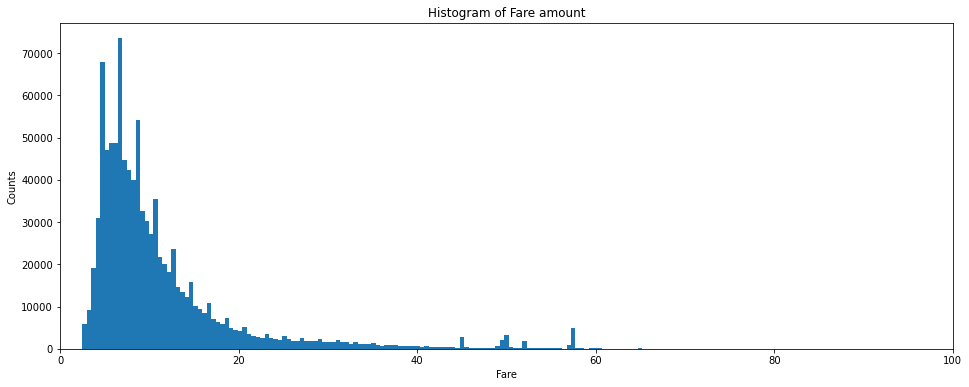

In [13]:
plt.figure(figsize=(16,6))
plt.hist(train_df['fare_amount'],bins=1000)
plt.xlabel('Fare')
plt.ylabel('Counts')
plt.title('Histogram of Fare amount')
plt.xlim(0,100)

Hence, the majority fare is distributed between (0-20)$. They might be few long trips for which the fare could have been slightly higher. Hence removing those outliers in fare amount

In [14]:
train_df=train_df.loc[train_df['fare_amount']<=60]

**Handling the pickup_datetime column**

In [15]:
#Extracting the year, month, day, weekday and time from the pickup_datetime column
train_df['year']=train_df.pickup_datetime.dt.year
train_df['month']=train_df.pickup_datetime.dt.month
train_df['day']=train_df.pickup_datetime.dt.day
train_df['Day_of_week']=train_df.pickup_datetime.dt.weekday
train_df['hour']=train_df.pickup_datetime.dt.hour

In [16]:
train_df.head()

,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,year,month,day,Day_of_week,hour
0,4.5,2009-06-15 17:26:21+00:00,-73.844311,40.721319,-73.841610,40.712278,1,2009,6,15,0,17
1,16.9,2010-01-05 16:52:16+00:00,-74.016048,40.711303,-73.979268,40.782004,1,2010,1,5,1,16
2,5.7,2011-08-18 00:35:00+00:00,-73.982738,40.761270,-73.991242,40.750562,2,2011,8,18,3,0
3,7.7,2012-04-21 04:30:42+00:00,-73.987130,40.733143,-73.991567,40.758092,1,2012,4,21,5,4
4,5.3,2010-03-09 07:51:00+00:00,-73.968095,40.768008,-73.956655,40.783762,1,2010,3,9,1,7


Hence, the year, month, day, week day and hours are added as separate columns.

#### Distance Travelled

The Haversine (or great circle) distance is the angular distance between two points on the surface of a sphere.
https://en.wikipedia.org/wiki/Haversine_formula
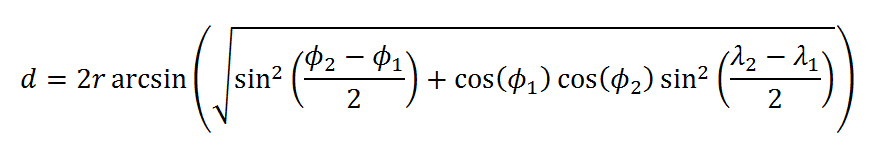

In [17]:
from math import radians, cos, sin, asin, sqrt

def distance_in_km(lon1, lat1, lon2, lat2):
    # convert decimal degrees to radians 
    lon1, lat1, lon2, lat2 = map(np.radians, [lon1, lat1, lon2, lat2])

    # haversine formula 
    dlon = lon2 - lon1 
    dlat = lat2 - lat1 
    a = np.sin(dlat/2)**2 + np.cos(lat1) * np.cos(lat2) * np.sin(dlon/2)**2
    c = 2 * np.arcsin(np.sqrt(a)) 
    r = 6371 # Radius of earth in kilometers. 
    return c * r

In [18]:
train_df['distance_km']=distance_in_km(train_df['pickup_longitude'],train_df['pickup_latitude'],train_df['dropoff_longitude'],train_df['dropoff_latitude'])

In [19]:
train_df.head()

,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,year,month,day,Day_of_week,hour,distance_km
0,4.5,2009-06-15 17:26:21+00:00,-73.844311,40.721319,-73.841610,40.712278,1,2009,6,15,0,17,1.030764
1,16.9,2010-01-05 16:52:16+00:00,-74.016048,40.711303,-73.979268,40.782004,1,2010,1,5,1,16,8.450134
2,5.7,2011-08-18 00:35:00+00:00,-73.982738,40.761270,-73.991242,40.750562,2,2011,8,18,3,0,1.389525
3,7.7,2012-04-21 04:30:42+00:00,-73.987130,40.733143,-73.991567,40.758092,1,2012,4,21,5,4,2.799270
4,5.3,2010-03-09 07:51:00+00:00,-73.968095,40.768008,-73.956655,40.783762,1,2010,3,9,1,7,1.999157


Hence the distance column is added.

In [20]:
train_df['distance_km'].describe()

count    973176.000000
mean          3.298611
std           3.690989
min           0.000000
25%           1.253283
50%           2.149419
75%           3.902972
max         116.135048
Name: distance_km, dtype: float64

Hence there are some outliers in the distance as the max distance goes upto 116 km. A 116 km ride is not possible within a city and hence could be removed. Also we have to note that the minimum distance is zero

Text(0.5, 1.0, 'Histogram of Distance')

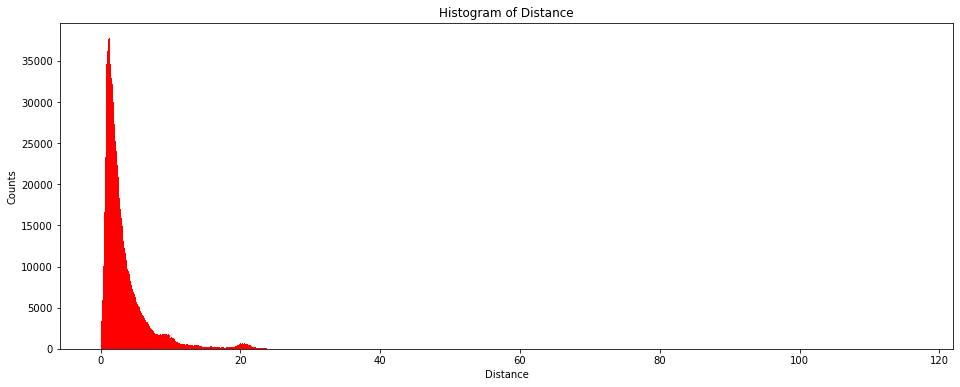

In [23]:
plt.figure(figsize=(16,6))
plt.hist(train_df['distance_km'],bins=1000,facecolor='red')
plt.xlabel('Distance')
plt.ylabel('Counts')
plt.title('Histogram of Distance')

Let us zoom the graph a bit below:

(0.0, 30.0)

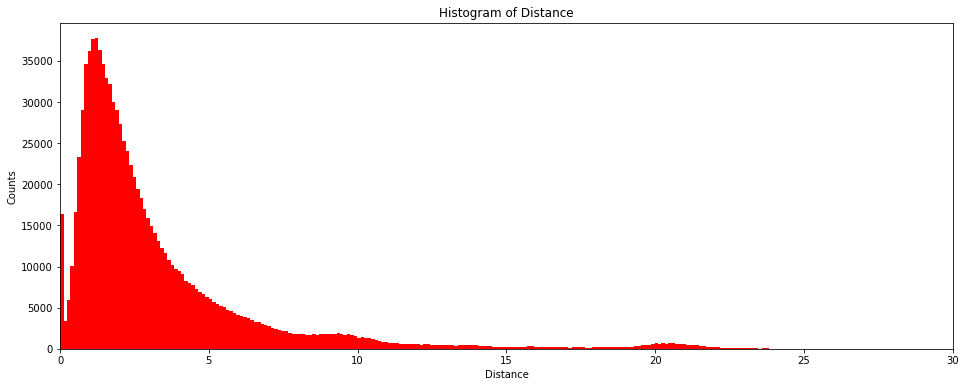

In [24]:
plt.figure(figsize=(16,6))
plt.hist(train_df['distance_km'],bins=1000,facecolor='red')
plt.xlabel('Distance')
plt.ylabel('Counts')
plt.title('Histogram of Distance')
plt.xlim(0,30)

In [27]:
train_df=train_df.loc[train_df['distance_km'].between(0.1,30)]

In [28]:
train_df['distance_km'].describe()

count    957058.000000
mean          3.336503
std           3.493822
min           0.100018
25%           1.290600
50%           2.185927
75%           3.948701
max          29.953314
Name: distance_km, dtype: float64

Since we have split the pickup_time column into multiple columns, we can remove the pickup_time column for training. 

In [29]:
train_df.drop(['pickup_datetime'],axis=1,inplace=True)
train_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 957058 entries, 0 to 999999
Data columns (total 12 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   fare_amount        957058 non-null  float64
 1   pickup_longitude   957058 non-null  float64
 2   pickup_latitude    957058 non-null  float64
 3   dropoff_longitude  957058 non-null  float64
 4   dropoff_latitude   957058 non-null  float64
 5   passenger_count    957058 non-null  int64  
 6   year               957058 non-null  int64  
 7   month              957058 non-null  int64  
 8   day                957058 non-null  int64  
 9   Day_of_week        957058 non-null  int64  
 10  hour               957058 non-null  int64  
 11  distance_km        957058 non-null  float64
dtypes: float64(6), int64(6)
memory usage: 94.9 MB


In [31]:
#final train data frame
train_df.head()

,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,year,month,day,Day_of_week,hour,distance_km
0,4.5,-73.844311,40.721319,-73.841610,40.712278,1,2009,6,15,0,17,1.030764
1,16.9,-74.016048,40.711303,-73.979268,40.782004,1,2010,1,5,1,16,8.450134
2,5.7,-73.982738,40.761270,-73.991242,40.750562,2,2011,8,18,3,0,1.389525
3,7.7,-73.987130,40.733143,-73.991567,40.758092,1,2012,4,21,5,4,2.799270
4,5.3,-73.968095,40.768008,-73.956655,40.783762,1,2010,3,9,1,7,1.999157


### Analyzing Test data

In [32]:
test_df = pd.read_csv(r'C:\Users\Prasanna\Documents\IIT Hyderabad\Sem 1\ML\Assignment_4\test.csv', parse_dates=["pickup_datetime"])
test_df.head()

,key,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
0,2015-01-27 13:08:24.0000002,2015-01-27 13:08:24+00:00,-73.973320,40.763805,-73.981430,40.743835,1
1,2015-01-27 13:08:24.0000003,2015-01-27 13:08:24+00:00,-73.986862,40.719383,-73.998886,40.739201,1
2,2011-10-08 11:53:44.0000002,2011-10-08 11:53:44+00:00,-73.982524,40.751260,-73.979654,40.746139,1
3,2012-12-01 21:12:12.0000002,2012-12-01 21:12:12+00:00,-73.981160,40.767807,-73.990448,40.751635,1
4,2012-12-01 21:12:12.0000003,2012-12-01 21:12:12+00:00,-73.966046,40.789775,-73.988565,40.744427,1


In [33]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9914 entries, 0 to 9913
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype              
---  ------             --------------  -----              
 0   key                9914 non-null   object             
 1   pickup_datetime    9914 non-null   datetime64[ns, UTC]
 2   pickup_longitude   9914 non-null   float64            
 3   pickup_latitude    9914 non-null   float64            
 4   dropoff_longitude  9914 non-null   float64            
 5   dropoff_latitude   9914 non-null   float64            
 6   passenger_count    9914 non-null   int64              
dtypes: datetime64[ns, UTC](1), float64(4), int64(1), object(1)
memory usage: 542.3+ KB


In [34]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9914 entries, 0 to 9913
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype              
---  ------             --------------  -----              
 0   key                9914 non-null   object             
 1   pickup_datetime    9914 non-null   datetime64[ns, UTC]
 2   pickup_longitude   9914 non-null   float64            
 3   pickup_latitude    9914 non-null   float64            
 4   dropoff_longitude  9914 non-null   float64            
 5   dropoff_latitude   9914 non-null   float64            
 6   passenger_count    9914 non-null   int64              
dtypes: datetime64[ns, UTC](1), float64(4), int64(1), object(1)
memory usage: 542.3+ KB


In [35]:
test_df.describe()

,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
count,9914.000000,9914.000000,9914.000000,9914.000000,9914.000000
mean,-73.974722,40.751041,-73.973657,40.751743,1.671273
std,0.042774,0.033541,0.039072,0.035435,1.278747
min,-74.252193,40.573143,-74.263242,40.568973,1.000000
25%,-73.992501,40.736125,-73.991247,40.735254,1.000000
50%,-73.982326,40.753051,-73.980015,40.754065,1.000000
75%,-73.968013,40.767113,-73.964059,40.768757,2.000000
max,-72.986532,41.709555,-72.990963,41.696683,6.000000


Let us create a separate data frame for predictions in kaggle:

In [36]:
predicted_df = pd.DataFrame(test_df['key'], columns = ['key'])
predicted_df.head()

,key
0,2015-01-27 13:08:24.0000002
1,2015-01-27 13:08:24.0000003
2,2011-10-08 11:53:44.0000002
3,2012-12-01 21:12:12.0000002
4,2012-12-01 21:12:12.0000003


Preparing Test data in accordance with Train data:

In [37]:
test_df.drop(['key'],axis=1,inplace=True)
test_df['year']=test_df.pickup_datetime.dt.year
test_df['month']=test_df.pickup_datetime.dt.month
test_df['day']=test_df.pickup_datetime.dt.day
test_df['Day_of_week']=test_df.pickup_datetime.dt.weekday
test_df['hour']=test_df.pickup_datetime.dt.hour
test_df.drop(['pickup_datetime'],axis=1,inplace=True)
test_df.head()

,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,year,month,day,Day_of_week,hour
0,-73.973320,40.763805,-73.981430,40.743835,1,2015,1,27,1,13
1,-73.986862,40.719383,-73.998886,40.739201,1,2015,1,27,1,13
2,-73.982524,40.751260,-73.979654,40.746139,1,2011,10,8,5,11
3,-73.981160,40.767807,-73.990448,40.751635,1,2012,12,1,5,21
4,-73.966046,40.789775,-73.988565,40.744427,1,2012,12,1,5,21


In [38]:
test_df['distance_km']=distance_in_km(test_df['pickup_longitude'],test_df['pickup_latitude'],test_df['dropoff_longitude'],test_df['dropoff_latitude'])

In [39]:
test_df.head()

,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,year,month,day,Day_of_week,hour,distance_km
0,-73.973320,40.763805,-73.981430,40.743835,1,2015,1,27,1,13,2.323260
1,-73.986862,40.719383,-73.998886,40.739201,1,2015,1,27,1,13,2.425353
2,-73.982524,40.751260,-73.979654,40.746139,1,2011,10,8,5,11,0.618628
3,-73.981160,40.767807,-73.990448,40.751635,1,2012,12,1,5,21,1.961033
4,-73.966046,40.789775,-73.988565,40.744427,1,2012,12,1,5,21,5.387301


In [40]:
test_df.describe()

,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,year,month,day,Day_of_week,hour,distance_km
count,9914.000000,9914.000000,9914.000000,9914.000000,9914.000000,9914.000000,9914.000000,9914.000000,9914.000000,9914.000000,9914.000000
mean,-73.974722,40.751041,-73.973657,40.751743,1.671273,2011.815816,6.857979,16.194170,2.852834,13.467420,3.435371
std,0.042774,0.033541,0.039072,0.035435,1.278747,1.803347,3.353272,8.838482,1.994451,6.868584,3.972374
min,-74.252193,40.573143,-74.263242,40.568973,1.000000,2009.000000,1.000000,1.000000,0.000000,0.000000,0.000000
25%,-73.992501,40.736125,-73.991247,40.735254,1.000000,2010.000000,4.000000,9.000000,1.000000,8.000000,1.298277
50%,-73.982326,40.753051,-73.980015,40.754065,1.000000,2012.000000,7.000000,16.000000,3.000000,15.000000,2.217412
75%,-73.968013,40.767113,-73.964059,40.768757,2.000000,2014.000000,10.000000,25.000000,5.000000,19.000000,4.045302
max,-72.986532,41.709555,-72.990963,41.696683,6.000000,2015.000000,12.000000,31.000000,6.000000,23.000000,99.996040


In [41]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9914 entries, 0 to 9913
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   pickup_longitude   9914 non-null   float64
 1   pickup_latitude    9914 non-null   float64
 2   dropoff_longitude  9914 non-null   float64
 3   dropoff_latitude   9914 non-null   float64
 4   passenger_count    9914 non-null   int64  
 5   year               9914 non-null   int64  
 6   month              9914 non-null   int64  
 7   day                9914 non-null   int64  
 8   Day_of_week        9914 non-null   int64  
 9   hour               9914 non-null   int64  
 10  distance_km        9914 non-null   float64
dtypes: float64(5), int64(6)
memory usage: 852.1 KB


#### Splitting main data and label

In [42]:
Ytrain_main=train_df['fare_amount']
Xtrain_main=train_df.drop(columns=['fare_amount'])

### Model building:

**1.Linear Regression**

In [43]:
from sklearn.linear_model import LinearRegression
lr=LinearRegression()
lr.fit(Xtrain_main,Ytrain_main)
Ypred_main=lr.predict(test_df)

In [44]:
Ypred_main

array([10.51632366, 10.33293673,  4.86741282, ..., 49.491012  ,
       22.56325786,  7.40172197])

Concatenating Y_pred_main to predicted_df

In [45]:
predicted_df['fare_amount'] = Ypred_main.tolist()
predicted_df.head()

,key,fare_amount
0,2015-01-27 13:08:24.0000002,10.516324
1,2015-01-27 13:08:24.0000003,10.332937
2,2011-10-08 11:53:44.0000002,4.867413
3,2012-12-01 21:12:12.0000002,8.538114
4,2012-12-01 21:12:12.0000003,16.475132


In [46]:
predicted_df.to_csv(r'C:\Users\Prasanna\Documents\IIT Hyderabad\Sem 1\ML\Assignment_4\taxi_2nd_time\linear_reg.csv', index=False)

Kaggle Score:
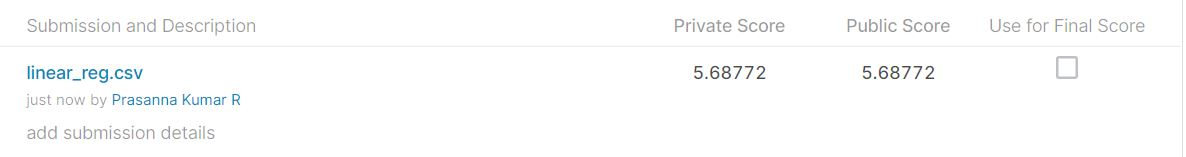

In [47]:
#deleting fare amount column for the next model
del predicted_df['fare_amount']
predicted_df.head()

,key
0,2015-01-27 13:08:24.0000002
1,2015-01-27 13:08:24.0000003
2,2011-10-08 11:53:44.0000002
3,2012-12-01 21:12:12.0000002
4,2012-12-01 21:12:12.0000003


**2.Random forest**

In [48]:
from sklearn.ensemble import RandomForestRegressor
rf=RandomForestRegressor()
rf.fit(Xtrain_main,Ytrain_main)
Ypred_rf=rf.predict(test_df)

In [49]:
predicted_df['fare_amount'] = Ypred_rf.tolist()
predicted_df.head()

,key,fare_amount
0,2015-01-27 13:08:24.0000002,10.135
1,2015-01-27 13:08:24.0000003,10.315
2,2011-10-08 11:53:44.0000002,4.148
3,2012-12-01 21:12:12.0000002,9.054
4,2012-12-01 21:12:12.0000003,16.980


In [50]:
predicted_df.to_csv(r'C:\Users\Prasanna\Documents\IIT Hyderabad\Sem 1\ML\Assignment_4\taxi_2nd_time\Random_forest.csv', index=False)

Kaggle Score for random forest:
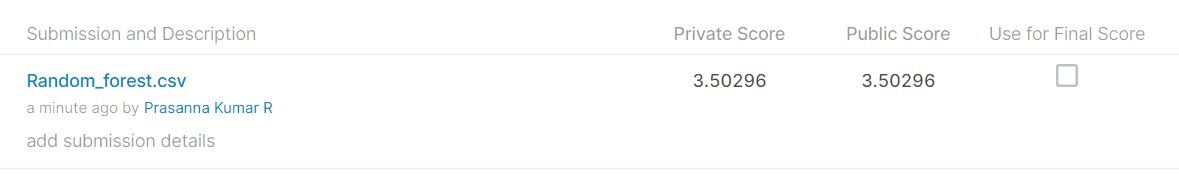


In [51]:
del predicted_df['fare_amount']

**3. Gradient Boosting**

In [52]:
from sklearn.ensemble import GradientBoostingRegressor
GB= GradientBoostingRegressor()
GB.fit(Xtrain_main,Ytrain_main)
Ypred_GB=GB.predict(test_df)

In [53]:
predicted_df['fare_amount'] = Ypred_GB.tolist()
predicted_df.head()

,key,fare_amount
0,2015-01-27 13:08:24.0000002,10.538950
1,2015-01-27 13:08:24.0000003,10.881267
2,2011-10-08 11:53:44.0000002,5.092039
3,2012-12-01 21:12:12.0000002,8.371485
4,2012-12-01 21:12:12.0000003,14.997151


In [54]:
predicted_df.to_csv(r'C:\Users\Prasanna\Documents\IIT Hyderabad\Sem 1\ML\Assignment_4\taxi_2nd_time\Gradient_boosting.csv', index=False)

Kaggle Score for Gradient Boosting:
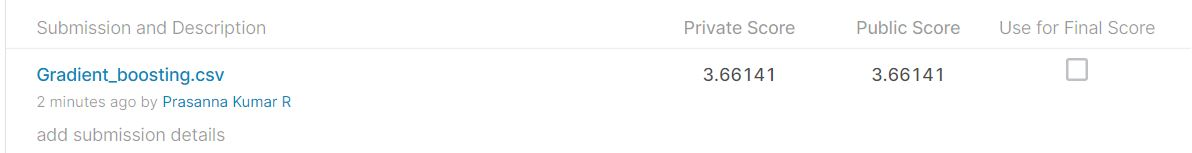

**4. XG Boost**

In [58]:
import xgboost as xg
xgb_r = xg.XGBRegressor(objective ='reg:linear',n_estimators = 500, seed = 123)
xgb_r.fit(Xtrain_main,Ytrain_main)
Ypred_XGB=xgb_r.predict(test_df)

[22:29:08] WARNING: c:\ci\xgboost-split_1619728435298\work\src\objective\regression_obj.cu:170: reg:linear is now deprecated in favor of reg:squarederror.


In [59]:
del predicted_df['fare_amount']
predicted_df['fare_amount'] = Ypred_XGB.tolist()
predicted_df.head()

,key,fare_amount
0,2015-01-27 13:08:24.0000002,9.815044
1,2015-01-27 13:08:24.0000003,10.662737
2,2011-10-08 11:53:44.0000002,4.269950
3,2012-12-01 21:12:12.0000002,9.368874
4,2012-12-01 21:12:12.0000003,16.328506


In [60]:
predicted_df.to_csv(r'C:\Users\Prasanna\Documents\IIT Hyderabad\Sem 1\ML\Assignment_4\taxi_2nd_time\XG_boost1.csv', index=False)

Kaggle score for XG boosting:
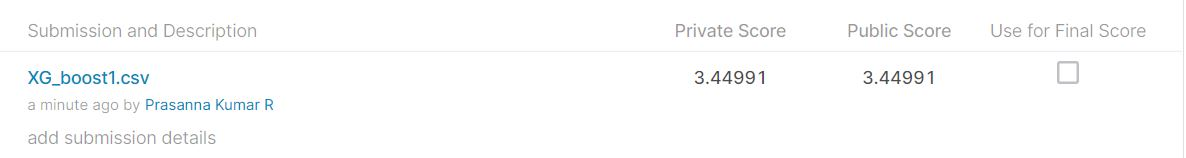